In [93]:
import pandas as pd
import numpy as np
import datetime
import calendar
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

def new_comparison(dfs_to_compare,criteria,index_names):
    df = pd.DataFrame()
    j = 0
    for i in index_names:
        df[i] = dfs_to_compare[j][criteria]
        j = j +1
    return df

#FUNCION PARA CONVERTIR FECHA A DIA DE LA SEMANA
def fecha_a_dia(dia):
    return calendar.day_name[dia.weekday()]

#dias = {'day_of_week': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],}
#df_dias = pd.DataFrame(dias,columns=['day_of_week'])
#df_dias['numbers'] = [0]
#df_dias['rep'] = 0

#def day_rep(df_dias, df){
# SI DF.DIA NO ESTA EN DF_DIAS[DF.DIA_DE_SEMANA].NUMEROS => DF_DIAS[DF.DIA_DE_SEMANA].REP ++
    

In [85]:
#LEO CSV DETALLANDO LOS TIPOS POR COLUMNA
types = {'advertiser_id':'int8','action':'category','source_id':'int8','latitude':'float64','created':'object','longitude':'float64','wifi_connection':'category','carrier_id':'float64','trans_id':'object','os_minor':'float','agent_device':'float','os_mayor':'float64','specs_brand':'category','brand':'float64','timeToClick':'float64','touchX':'float64','touchY':'float64','ref_type':'category','ref_hash':'int64'}
clicks = pd.read_csv('../../../datos_tp/clicks.csv', dtype = types)

In [86]:
#CASTEO LA FECHA
clicks['created'] = pd.to_datetime(clicks['created'], format= '%Y-%m-%d %H:%M:%S')
clicks.dtypes

advertiser_id                int8
action_id                 float64
source_id                    int8
created            datetime64[ns]
country_code                int64
latitude                  float64
longitude                 float64
wifi_connection          category
carrier_id                float64
trans_id                   object
os_minor                  float64
agent_device              float64
os_major                  float64
specs_brand              category
brand                     float64
timeToClick               float64
touchX                    float64
touchY                    float64
ref_type                 category
ref_hash                    int64
dtype: object

In [87]:
#APLICO FUNCION AL DATA FRAME
clicks['day_of_week'] = clicks['created'].map(fecha_a_dia)
clicks.head()

,advertiser_id,action_id,source_id,created,country_code,latitude,longitude,wifi_connection,carrier_id,trans_id,...,agent_device,os_major,specs_brand,brand,timeToClick,touchX,touchY,ref_type,ref_hash,day_of_week
0,2,NaN,4,2019-03-06 22:42:12.755,6333597102633388268,1.205689,1.070234,False,1.0,iGgClCM9exiHF4K31g94XmvHEBSLKIY,...,NaN,3.072849e+18,2733035977666442898,NaN,1.563,0.905,0.078,1891515180541284343,1904083516767779093,Wednesday
1,0,NaN,0,2019-03-08 10:24:30.641,6333597102633388268,1.218924,1.071209,False,4.0,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,...,NaN,1.774085e+18,392184377613098015,NaN,NaN,NaN,NaN,1891515180541284343,3086509764961796666,Friday
2,0,NaN,0,2019-03-08 15:24:16.069,6333597102633388268,1.205689,1.070234,False,6.0,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,...,NaN,3.072849e+18,392184377613098015,NaN,NaN,0.946,0.473,1891515180541284343,6958163894863846647,Friday
3,2,NaN,3,2019-03-06 03:08:51.543,6333597102633388268,1.205689,1.070234,False,45.0,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,...,NaN,3.072849e+18,2733035977666442898,NaN,19.013,0.035,0.431,1891515180541284343,4368617728156436525,Wednesday
4,2,NaN,3,2019-03-06 03:32:55.570,6333597102633388268,1.205689,1.070234,False,45.0,X5XTOcYQovkl6yadYdAD7xioVGU9jiY,...,NaN,3.072849e+18,2733035977666442898,NaN,28.110,0.054,0.423,1891515180541284343,4368617728156436525,Wednesday


C:\Users\Joaquin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,counts
day_of_week,
Friday,2839
Monday,4557
Saturday,3283
Sunday,3966
Thursday,2989
Tuesday,5204
Wednesday,3468


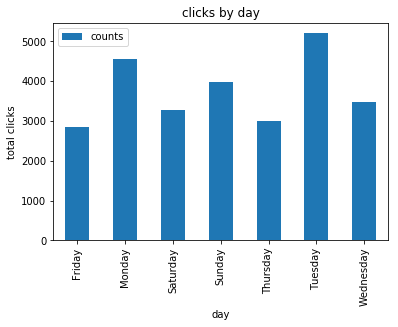

In [74]:
#PLOTEO CANTIDAD DE CLICKS POR DIA DE LA SEMANA
clicks['day'] = clicks['created'].apply(lambda x: x.day)

#SACO DIAS 5 y 6
clicks = clicks.loc[((clicks.day != 5) & (clicks.day != 6))]

clicks['counts'] = 1
days_group = clicks.groupby('day_of_week').agg({'counts':'sum'})
ax = days_group.plot.bar(title = 'clicks by day')
ax.set_xlabel('day')
ax.set_ylabel('total clicks')
days_group

In [82]:
clicks.loc[((clicks['day_of_week'] == "Saturday") | (clicks['day_of_week'] == "Sunday")), 'weekend'] = True
clicks.loc[((clicks['day_of_week'] != "Saturday") & (clicks['day_of_week'] != "Sunday")), 'weekend'] = False


C:\Users\Joaquin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


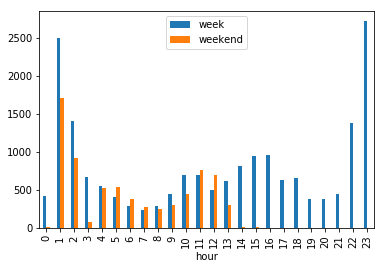

In [83]:
clicks['hour'] = clicks['created'].apply(lambda x: x.hour)
week_hg = clicks.loc[clicks.weekend==False].groupby(['hour']).agg({'counts':'sum'})
weekend_hg = clicks.loc[clicks.weekend==True].groupby(['hour']).agg({'counts':'sum'})

comparison = new_comparison([week_hg,weekend_hg],'counts',['week','weekend'])
ax = comparison.plot.bar()

In [97]:
total = pd.DataFrame({'week_percentils':[((week_hg['counts'].sum())/5),((weekend_hg['counts'].sum())/2)]}, index = ['week','weekend'])
total
#total.plot.pie(y = '% of total auctions',autopct='%1.1f%%',title = 'Total auctions share by platform')

,week_percentils
week,3811.4
weekend,3624.5
